In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

__Generate data set - not part of homework__

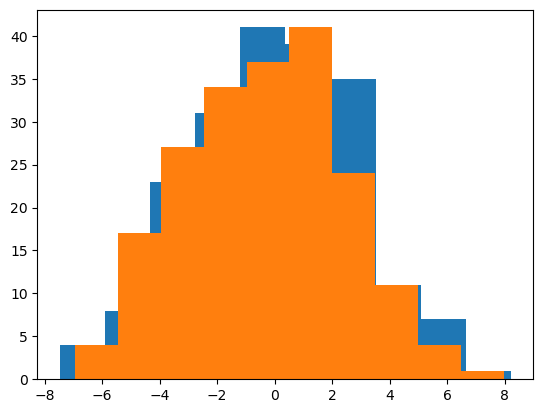

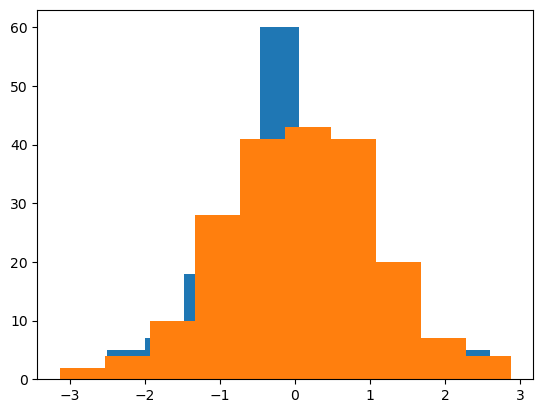

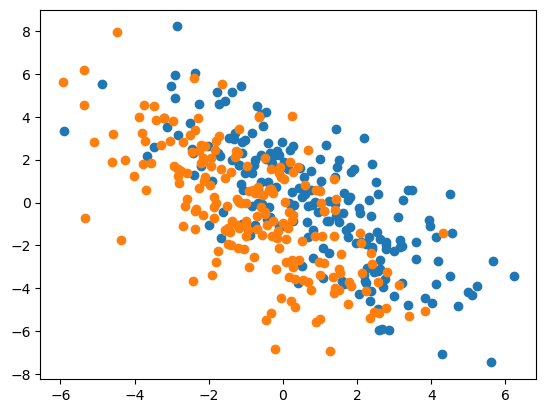

In [29]:


# Define a Gaussian function
def gauss(x, a, x0, sigma):
    return a*np.exp(-(x-x0)**2/(2*(sigma**2)))

def dbl_gauss(x, a1,a2, x0, sigma1,sigma2):
    dx2 = (x-x0)**2
    y = a1*np.exp(-dx2/(2*(sigma1**2)))
    y = y + a2*np.exp(-dx2/(2*(sigma2**2)))
    return y

npoint = 200
A_y1 = np.empty(npoint)
B_y1 = np.empty(npoint)

A_x1 = np.random.normal(1,2,npoint)
for i in range(len(A_x1)):
    A_y1[i] = (-A_x1[i] + np.random.normal(1,2.0))

A_z = np.random.normal(-0.1,1,npoint) 
B_z = np.random.normal(0.1,1,npoint)
B_x1 = np.random.normal(-1,2,npoint)
for i in range(len(A_x1)):
    B_y1[i] = (-B_x1[i] + np.random.normal(-1,2.0))
    
plt.figure()
plt.hist(A_y1)
plt.hist(B_y1)

plt.figure()
plt.hist(A_z)
plt.hist(B_z)

plt.figure()

plt.scatter(A_x1,A_y1)
plt.scatter(B_x1,B_y1)

# open a text file to store data

f = open("../Data/data_HW7.txt","w")
f.write("x1,x2,x3,Class\n")

for i in range(npoint):
    f.write(f"{A_x1[i]:.3}, {A_y1[i]:.3}, {A_z[i]:.3},0\n")
    f.write(f"{B_x1[i]:.3}, {B_y1[i]:.3}, {B_z[i]:.3},1\n")
        
f.close()

__Get libraries and read the data for HW 7__

<Axes: xlabel='x1', ylabel='x2'>

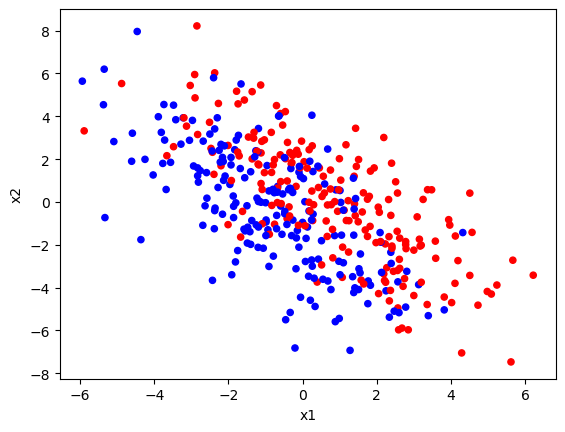

In [30]:
# get the libraries etc we need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("../Data/data_HW7.txt")
s1 = data["x1"]
s2 = data["x2"]
s3 = data["x3"]
typ = data["Class"]

col = []
for i in data["Class"]:
    if typ[i] == 0:
        col.append("red")
    else:
        col.append("blue")

data.plot.scatter("x1","x2",c=col)


In [31]:

# Import train_test_split function
from sklearn.model_selection import train_test_split
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
#Import scikit-learn MLP classifier
from sklearn.neural_network import MLPClassifier 


# get feature and target data for each object
x1 = np.array(data["x1"])
x2 = np.array(data["x2"])
x3 = np.array(data["x3"])
X = np.empty((len(x1),3))

# i'm sure this could be done in one line
for i in range(len(x1)):
    X[i] = [x1[i],x2[i],x3[i]]

y = np.array(data["Class"])



acc_test = []
acc_train = []



# the accurance will not be the same everytime the model is created and fitted is done 
# depends on random number generator initial seeds
# to see variation, train the model 100 different times and 
# measure the accuracy for training and test sample every time
# there is also some smaller variation from the train_test_split function
# if no random_state is given

for i in range(100):
    if(i%10 == 0):
        print("Iteration ",i)

# split data into 50% training and 50% test set 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5) 
# Create MLP classifer object
    mlp = MLPClassifier(solver='adam', hidden_layer_sizes=(5,5), max_iter=5000)

# train model
    model = mlp.fit(X_train, y_train)
    
# predict on test and training data
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)

# get and store accuracy for test and training data
    acc_test.append(metrics.accuracy_score(y_test, y_pred_test))
    acc_train.append(metrics.accuracy_score(y_train, y_pred_train))
    
print("done!")

Iteration  0
Iteration  10
Iteration  20
Iteration  30
Iteration  40
Iteration  50
Iteration  60
Iteration  70
Iteration  80
Iteration  90
done!


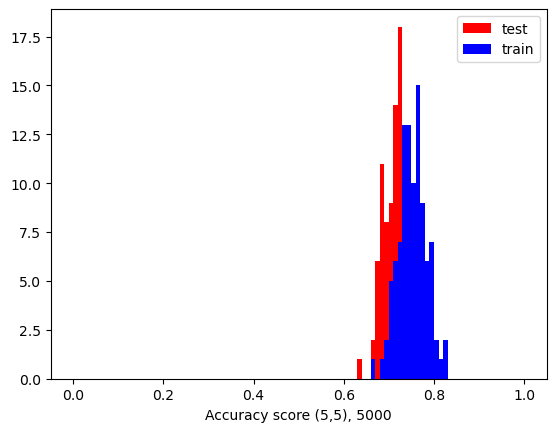

Answer 1: average test set accuracy is 0.72
Answer 2: average training set accuracy is 0.75


In [32]:
# plot the accuracy results for test and training data
fig,ax = plt.subplots()
plt.hist(acc_test, bins = 100,range = (0,1),color="red",label = "test")
plt.hist(acc_train, bins = 100, range = (0,1), color="blue",label = "train")
plt.xlabel("Accuracy score (5,5), 5000")
plt.legend()
plt.show()
print(f"Answer 1: average test set accuracy is {np.mean(acc_test):.2}")
print(f"Answer 2: average training set accuracy is {np.mean(acc_train):.2}")

__Question 3 should have asked about train_test_split and mlp setup step__

In [33]:
acc_test = []
acc_train = []

# the accurance will not be the same everytime the fitting is done 
# depends on random number generator initial seed
# to see variation, train the model 100 different times and 
# measure the accuracy for training and test sample every time
# there is also some smaller variation from the train_test_split function
# if no random_state is given

for i in range(100):
    if(i%10 == 0):
        print("Iteration ",i)
      
# same as before, but fix initial random seeds
#split data into 50% training and 50% test set 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, 
                                                        random_state = 2) 
# Create MLP classifer object
    mlp = MLPClassifier(solver='adam', hidden_layer_sizes=(5,5), max_iter=5000, 
                        random_state = 3)

# train model
    model = mlp.fit(X_train, y_train)
    
# predict on test and training data
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)

# get and store accuracy for test and training data
    acc_test.append(metrics.accuracy_score(y_test, y_pred_test))
    acc_train.append(metrics.accuracy_score(y_train, y_pred_train))
    
print("done!")

Iteration  0
Iteration  10
Iteration  20
Iteration  30
Iteration  40
Iteration  50
Iteration  60
Iteration  70
Iteration  80
Iteration  90
done!


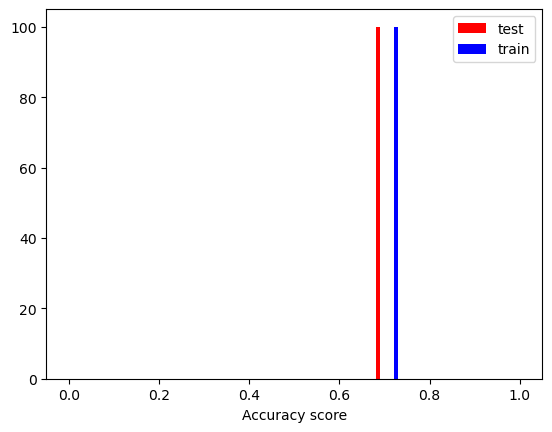

Answer 3: Only by fixing  random seed for both can we eliminate fluctuations


In [34]:
# plot the accuracy results for test and training data
fig,ax = plt.subplots()
plt.hist(acc_test, bins = 100,range = (0,1),color="red",label = "test")
plt.hist(acc_train, bins = 100, range = (0,1), color="blue",label = "train")
plt.xlabel("Accuracy score")
plt.legend()
plt.show()
print(f"Answer 3: Only by fixing  random seed for both can we eliminate fluctuations")


__but fixing the random seed does not mean that you get the RIGHT answer. It just means you get the same answer every time__

__Now repeat for (20,20) hidden layers and 50000 max_iter__

In [35]:
acc_test = []
acc_train = []

# the accurance will not be the same everytime the fitting is done 
# depends on random number generator initial seed
# to see variation, train the model 100 different times and 
# measure the accuracy for training and test sample every time
# there is also some smaller variation from the train_test_split function
# if no random_state is given

for i in range(100):
    if(i%10 == 0):
        print("Iteration ",i)
      
# same as before, but fix initial random seeds
#split data into 50% training and 50% test set 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
# Create MLP classifer object
    mlp = MLPClassifier(solver='adam', hidden_layer_sizes=(20,20), max_iter=50000)

# train model
    model = mlp.fit(X_train, y_train)
    
# predict on test and training data
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)

# get and store accuracy for test and training data
    acc_test.append(metrics.accuracy_score(y_test, y_pred_test))
    acc_train.append(metrics.accuracy_score(y_train, y_pred_train))
    
print("done!")

Iteration  0
Iteration  10
Iteration  20
Iteration  30
Iteration  40
Iteration  50
Iteration  60
Iteration  70
Iteration  80
Iteration  90
done!


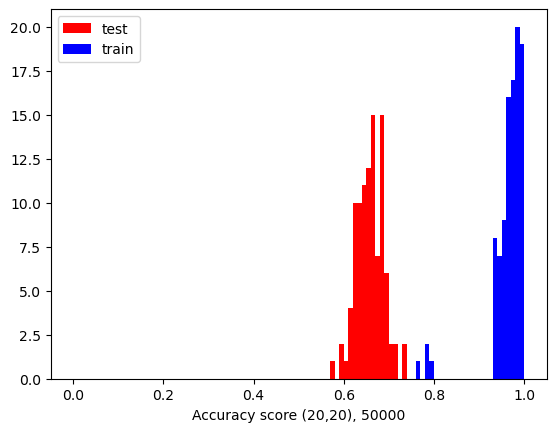

Average test set accuracy is 0.66
Average training set accuracy is 0.96
Depending on random number seeds, both answer d and e should be counted


In [36]:
# plot the accuracy results for test and training data
fig,ax = plt.subplots()
plt.hist(acc_test, bins = 100,range = (0,1),color="red",label = "test")
plt.hist(acc_train, bins = 100, range = (0,1), color="blue",label = "train")
plt.xlabel("Accuracy score (20,20), 50000")
plt.legend()
plt.show()
print(f"Average test set accuracy is {np.mean(acc_test):.2}")
print(f"Average training set accuracy is {np.mean(acc_train):.2}")
print("Depending on random number seeds, both answer d and e should be counted")

__Question 5: Installing PyTorch. Please let TA know if you have been able to install PyTorch. If everyone has it on their computer or can install it on their computer, I will use PyTorch for Homework 9. If many people can not run PyTorch, I will write a different homework problem.__